# Naive Bayes Classification for Iris Dataset

In this project, we will perform Naive Bayes classification on the Iris dataset to predict the species of flowers using different features. We will follow these steps:

## Step 1: Dataset Summary

We will begin by loading and summarizing the Iris dataset. This step will help us understand the data we are working with.

## Step 2: Data Preprocessing

Before training the Naive Bayes classifier, we will preprocess the dataset. This includes splitting the data into training and testing sets.

## Step 3: Naive Bayes Classification

We will implement the Naive Bayes classification algorithm from scratch to predict the species of flowers based on the selected features.

## Step 4: Data Visualization

i. **Density Plot**: We will create density plots for each feature to visualize the distribution of data.

ii. **Confusion Matrix and Accuracy**: We will calculate the confusion matrix and accuracy of our predictions to evaluate the model's performance.

iii. **Class-wise Probabilities and Histogram**: We will compute class-wise probabilities for the predicted results and visualize them using a histogram.

iv. **Decision Boundary Scatter Plot**: We will create scatter plots to visualize the decision boundary between Sepal length and Sepal width for all species.



## Conclusion

This project will provide a comprehensive analysis of the Iris dataset using Naive Bayes classification. We will visualize data, evaluate the model's performance, and create insightful visualizations to understand the decision boundary between Sepal length and Sepal width for different species of flowers.

Remember to replace the code placeholder with your actual code for each step.

In [ ]:
!pip install seaborn
!pip install sklearn
!pip install scikit-learn
!pip install matplotlib

In [1]:
def read_data(filename):
    data = []
    labels = []
    with open(filename, 'r') as file:
        lines = file.readlines()
        # Skip the header line
        lines = lines[1:]
        for line in lines:
            values = line.strip().split(',')
            data.append([float(x) for x in values[:-1]])
            labels.append(values[-1])
    return data, labels




train_data, train_labels = read_data("/content/iris_train.csv")
test_data, test_labels = read_data("/content/iris_test.csv")


In [2]:
def calculate_prior(labels):
    class_counts = {}
    total_count = len(labels)
    for label in labels:
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1
    prior_probabilities = {}
    for label, count in class_counts.items():
        prior_probabilities[label] = count / total_count
    return prior_probabilities


def calculate_likelihood(data, labels, feature_index, feature_value, class_label):
    count = 0
    total_count = 0
    for i in range(len(data)):
        if labels[i] == class_label:
            total_count += 1
            if data[i][feature_index] == feature_value:
                count += 1
    return count / total_count


def train_naive_bayes(train_data, train_labels):
    prior_probabilities = calculate_prior(train_labels)
    return prior_probabilities


def predict_naive_bayes(train_data, train_labels, test_data):
    prior_probabilities = train_naive_bayes(train_data, train_labels)
    predictions = []
    for test_instance in test_data:
        posterior_probabilities = {}
        for class_label in prior_probabilities:
            likelihood = 1
            for i in range(len(test_instance)):
                likelihood *= calculate_likelihood(train_data, train_labels, i, test_instance[i], class_label)
            posterior_probabilities[class_label] = prior_probabilities[class_label] * likelihood
        predicted_class = max(posterior_probabilities, key=posterior_probabilities.get)
        predictions.append(predicted_class)
    return predictions

def evaluate(predictions, test_labels):
    correct = sum(1 for p, t in zip(predictions, test_labels) if p == t)
    accuracy = correct / len(test_labels)
    return accuracy

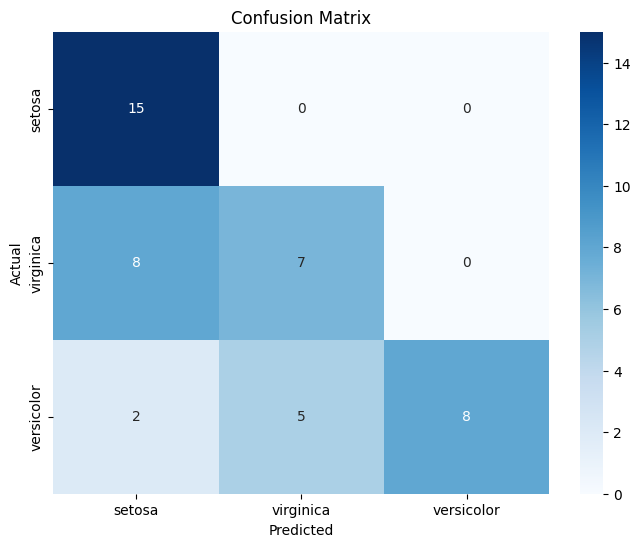

Accuracy: 66.67%


In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(predictions, labels):
    cm = confusion_matrix(labels, predictions, labels=list(set(labels)))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(set(labels)), yticklabels=list(set(labels)))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

predictions = predict_naive_bayes(train_data, train_labels, test_data)
accuracy = evaluate(predictions, test_labels)
plot_confusion_matrix(predictions, test_labels)
print(f'Accuracy: {accuracy*100:.2f}%')

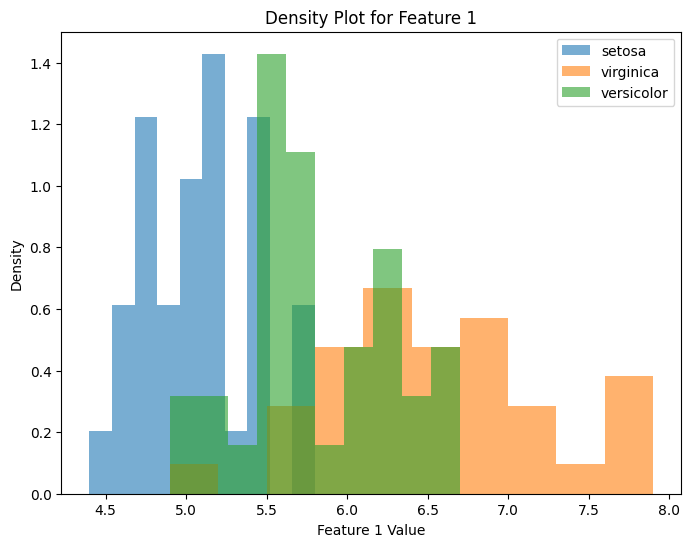

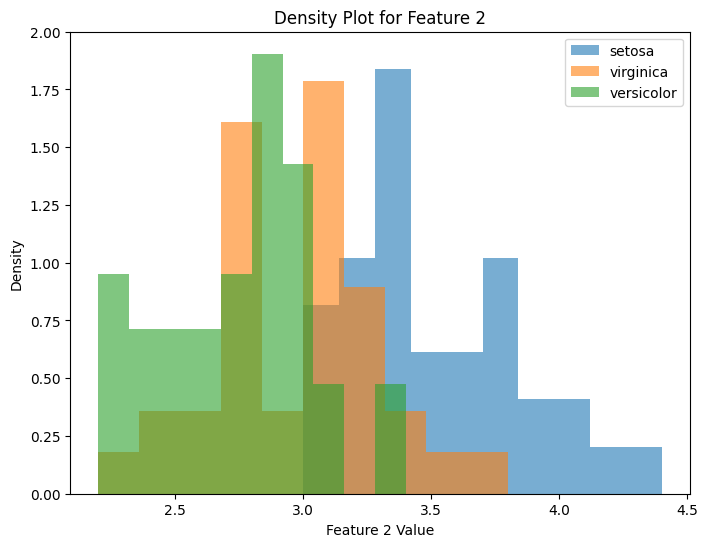

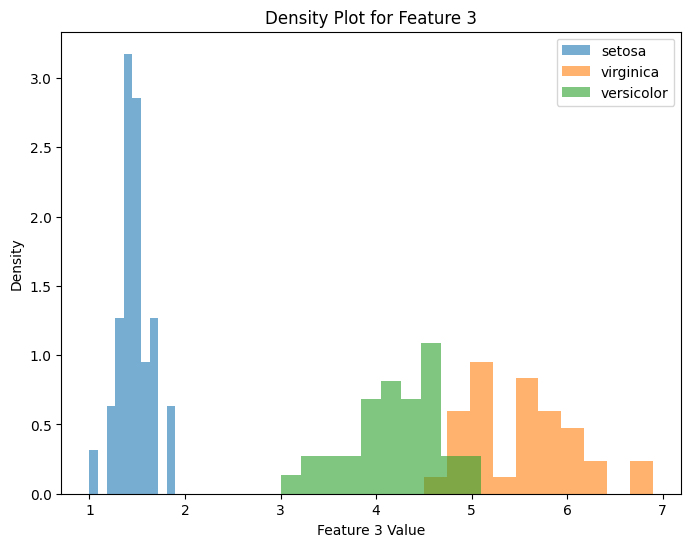

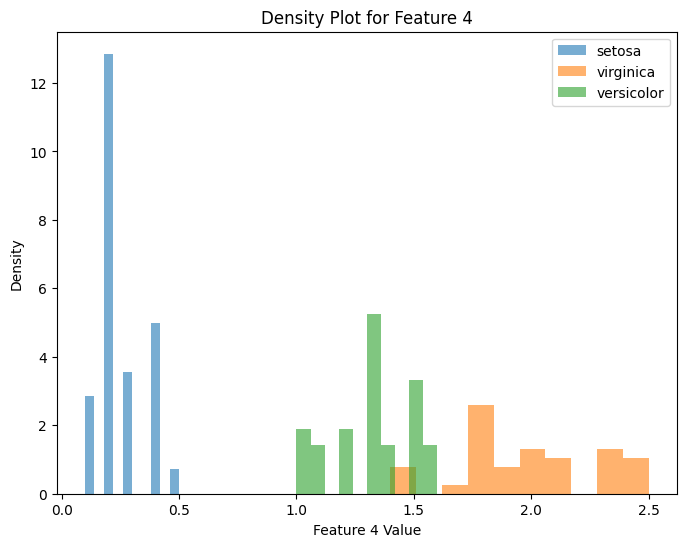

In [4]:
import matplotlib.pyplot as plt

def plot_density(data, labels):
    num_features = len(data[0])
    for i in range(num_features):
        plt.figure(figsize=(8, 6))
        for label in set(labels):
            feature_values = [data[j][i] for j in range(len(data)) if labels[j] == label]
            plt.hist(feature_values, density=True, alpha=0.6, label=label)
        plt.title(f'Density Plot for Feature {i+1}')
        plt.xlabel(f'Feature {i+1} Value')
        plt.ylabel('Density')
        plt.legend()
        plt.show()
        print()

plot_density(train_data, train_labels)


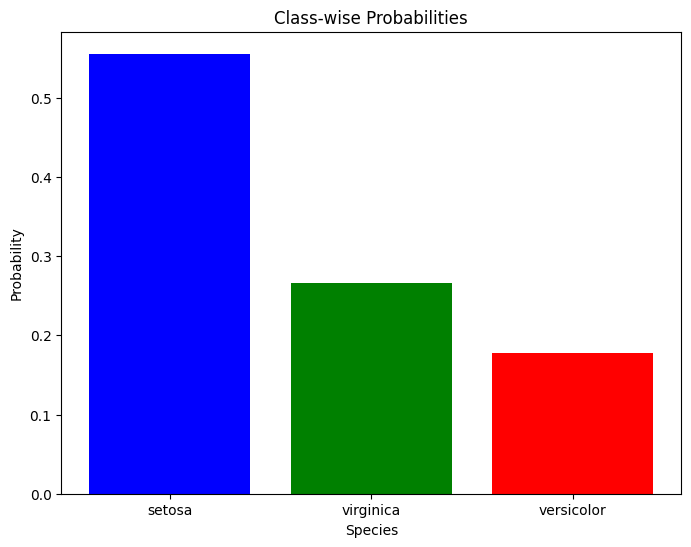

In [6]:
def class_wise_probabilities(predictions, labels):
    probabilities = {}
    for label in set(labels):
        probabilities[label] = sum(1 for p in predictions if p == label) / len(predictions)
    return probabilities

class_probabilities = class_wise_probabilities(predictions, test_labels)

plt.figure(figsize=(8, 6))
plt.bar(class_probabilities.keys(), class_probabilities.values(), color=['blue', 'green', 'red'])
plt.xlabel('Species')
plt.ylabel('Probability')
plt.title('Class-wise Probabilities')
plt.show()


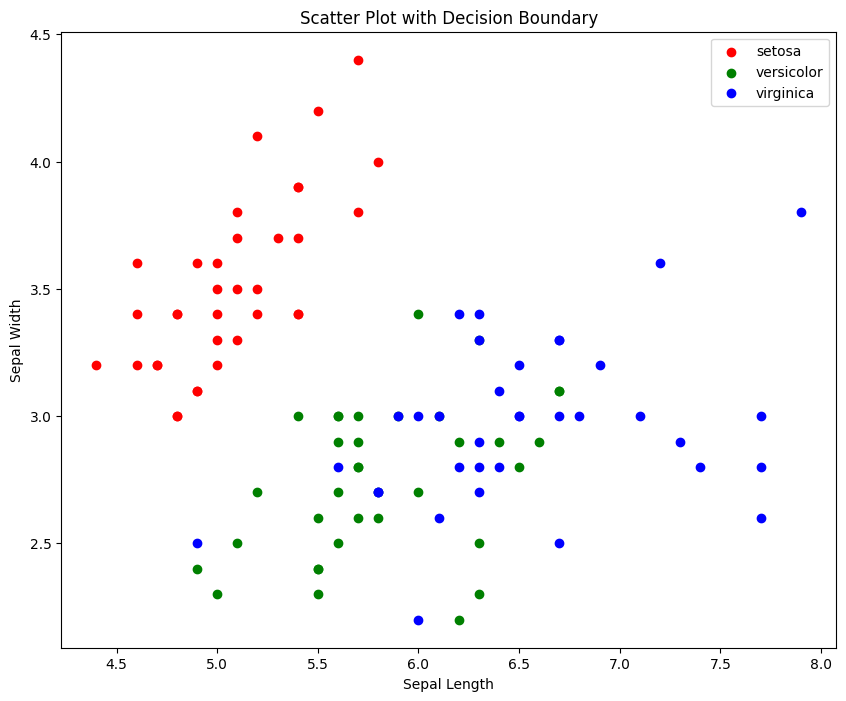

In [7]:

def plot_decision_boundary(data, labels):
    setosa_data = [data[i] for i in range(len(data)) if labels[i] == 'setosa']
    versicolor_data = [data[i] for i in range(len(data)) if labels[i] == 'versicolor']
    virginica_data = [data[i] for i in range(len(data)) if labels[i] == 'virginica']

    setosa_sepal_length = [x[0] for x in setosa_data]
    setosa_sepal_width = [x[1] for x in setosa_data]
    versicolor_sepal_length = [x[0] for x in versicolor_data]
    versicolor_sepal_width = [x[1] for x in versicolor_data]
    virginica_sepal_length = [x[0] for x in virginica_data]
    virginica_sepal_width = [x[1] for x in virginica_data]

    plt.figure(figsize=(10, 8))
    plt.scatter(setosa_sepal_length, setosa_sepal_width, c='r', label='setosa')
    plt.scatter(versicolor_sepal_length, versicolor_sepal_width, c='g', label='versicolor')
    plt.scatter(virginica_sepal_length, virginica_sepal_width, c='b', label='virginica')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Scatter Plot with Decision Boundary')
    plt.legend()
    plt.show()

plot_decision_boundary(train_data, train_labels)